<h1>Beginner's Guide to Popular LLM Models</h1>
<p>
In this tutorial, we will explore popular Large Language Models (LLMs) such as Google Gemini, DeepSeek, Mistral, Anthropic Claude, Groq, Grok, and ChatGPT, META LLAMA.<br>
You will learn how to create an API key for each platform.<br>
We will show how to load and use these models effectively.<br>
You will see the complete list of available models from each provider.<br>
Finally, we will compare model pricing to help you choose the best option.<br>
We’ll also build a powerfull agent with tools (custome and prebuilt) that selects and uses the user’s required LLM at runtime.<br>
</p>


#### All Chat model REFE in Langchain </br>
LLM Leader Board: https://www.vellum.ai/llm-leaderboard <br>
CHAT Model REFE: https://python.langchain.com/docs/integrations/chat/</br>
Providers REFE: https://python.langchain.com/docs/integrations/providers/all/</br>


## Use all LLM model

In [1]:
from typing import TypedDict, Annotated
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_tavily import TavilySearch
import datetime

import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_deepseek import ChatDeepSeek
from langchain_mistralai import ChatMistralAI
from langchain_anthropic import ChatAnthropic
from langchain_groq import ChatGroq
from langchain_xai import ChatXAI
from langchain_openai import ChatOpenAI


a:\Indian_AI_Production_5\agentic_ai\agentic_ai_projects\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Use Gemini Models </br>
Free and paid use<br>
API KEY [Dashboard]: https://aistudio.google.com/app/apikey </br>
Langchain Code : https://python.langchain.com/docs/integrations/chat/google_generative_ai/</br>
Models list[all types of models]: https://ai.google.dev/gemini-api/docs/models </br>
Price: https://ai.google.dev/gemini-api/docs/pricing<br>



In [2]:
llm_gemini = ChatGoogleGenerativeAI(
    model="gemini-2.5-pro",
)

In [3]:
llm_gemini.invoke(['hi'])

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--852df501-25cc-4300-84ee-7194e000cd20-0', usage_metadata={'input_tokens': 2, 'output_tokens': 9, 'total_tokens': 621, 'input_token_details': {'cache_read': 0}})

### use init_chat_model

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Feature</th>
      <th>ChatGoogleGenerativeAI</th>
      <th>init_chat_model</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>What it is</b></td>
      <td>Specific class for Google Gemini API</td>
      <td>Universal helper that picks correct class for given model/provider</td>
    </tr>
    <tr>
      <td><b>Scope</b></td>
      <td>Works only with Google Gemini API models</td>
      <td>Works with many providers (OpenAI, Anthropic, Mistral, Google, etc.)</td>
    </tr>
    <tr>
      <td><b>Provider Flexibility</b></td>
      <td>Google only</td>
      <td>Multi-provider support</td>
    </tr>
    <tr>
      <td><b>When to Use</b></td>
      <td>You know you will only use Gemini API</td>
      <td>You want provider-agnostic code, easy to switch providers</td>
    </tr>
    <tr>
      <td><b>Example</b></td>
      <td>
        <code>
        from langchain_google_genai import ChatGoogleGenerativeAI<br>
        llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite-preview")
        </code>
      </td>
      <td>
        <code>
        from langchain.chat_models import init_chat_model<br>
        llm = init_chat_model(model="gemini-2.0-flash-lite-preview", model_provider="google_genai")
        </code>
      </td>
    </tr>
    <tr>
      <td><b>Pros</b></td>
      <td>Direct, simple, minimal setup for Google API</td>
      <td>Flexible, works with many providers, great for configurable systems</td>
    </tr>
    <tr>
      <td><b>Cons</b></td>
      <td>Locked to Google Gemini API</td>
      <td>Requires correct provider mapping or package installed</td>
    </tr>
  </tbody>
</table>


In [4]:
llm_gemini = init_chat_model(model="gemini-2.0-flash-lite-preview", model_provider="google_genai",)
llm_gemini.invoke(['hi'])

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--8a3e66ba-7316-4033-aaad-8413e4861439-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

### Check model access using API Key

In [5]:
import requests
import os

# Set your Gemini API key
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")  # or replace with your key string

# Endpoint for listing available models
url = "https://generativelanguage.googleapis.com/v1beta/models"

params = {
    "key": GOOGLE_API_KEY
}

response = requests.get(url, params=params)

if response.status_code == 200:
    models = response.json().get("models", [])
    print("Available Gemini models:")
    for model in models:
        print(f"- {model.get('name')} | {model.get('displayName')} | {model.get('description')}")
else:
    print("Error:", response.status_code, response.text)


Available Gemini models:
- models/embedding-gecko-001 | Embedding Gecko | Obtain a distributed representation of a text.
- models/gemini-1.5-pro-latest | Gemini 1.5 Pro Latest | Alias that points to the most recent production (non-experimental) release of Gemini 1.5 Pro, our mid-size multimodal model that supports up to 2 million tokens.
- models/gemini-1.5-pro-002 | Gemini 1.5 Pro 002 | Stable version of Gemini 1.5 Pro, our mid-size multimodal model that supports up to 2 million tokens, released in September of 2024.
- models/gemini-1.5-pro | Gemini 1.5 Pro | Stable version of Gemini 1.5 Pro, our mid-size multimodal model that supports up to 2 million tokens, released in May of 2024.
- models/gemini-1.5-flash-latest | Gemini 1.5 Flash Latest | Alias that points to the most recent production (non-experimental) release of Gemini 1.5 Flash, our fast and versatile multimodal model for scaling across diverse tasks.
- models/gemini-1.5-flash | Gemini 1.5 Flash | Alias that points to the mos

## Use Deepseek models </br>
Only Paid use<br>
API KEY: https://platform.deepseek.com/api_keys</br>
Langchain Code: https://python.langchain.com/docs/integrations/chat/deepseek/</br>
Models & Pricing: https://api-docs.deepseek.com/quick_start/pricing</br>



In [6]:
llm_deepseek = ChatDeepSeek(
    model="deepseek-chat")

In [7]:
llm_deepseek.invoke(['hi'])
#Deepseek is not free using api
#need minimum top up : https://platform.deepseek.com/top_up

APIStatusError: Error code: 402 - {'error': {'message': 'Insufficient Balance', 'type': 'unknown_error', 'param': None, 'code': 'invalid_request_error'}}

## Use MISTRAL Model </br>
Free and paise Use<br>
API Key[dashboard]: https://admin.mistral.ai/organization/api-keys</br>
Langchain Code: https://python.langchain.com/docs/integrations/chat/mistralai/</br>
Models: https://docs.mistral.ai/getting-started/models/models_overview/</br>
Price: https://mistral.ai/pricing#api-pricing<br>



In [8]:
llm_mistralai = ChatMistralAI(
    model="ministral-3b-2410")

In [9]:
llm_mistralai.invoke(['hi'])

AIMessage(content="Hello! How are you today? How can I assist you? Let's chat about anything you'd like. 😊", additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 4, 'total_tokens': 30, 'completion_tokens': 26}, 'model_name': 'ministral-3b-2410', 'model': 'ministral-3b-2410', 'finish_reason': 'stop'}, id='run--ac27ad39-8cd1-414e-8ed7-a7b26f9ad915-0', usage_metadata={'input_tokens': 4, 'output_tokens': 26, 'total_tokens': 30})

In [10]:
## Or 
llm_mistralai = init_chat_model(
    model="ministral-3b-2410",
    model_provider="mistralai")
llm_mistralai.invoke(['hi'])

AIMessage(content="Hello! How are you doing today? Is there something specific you would like to talk about or ask me? I'm here to help! 😊", additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 4, 'total_tokens': 36, 'completion_tokens': 32}, 'model_name': 'ministral-3b-2410', 'model': 'ministral-3b-2410', 'finish_reason': 'stop'}, id='run--265d0d7d-c45d-408e-b38f-b6d00297dedc-0', usage_metadata={'input_tokens': 4, 'output_tokens': 32, 'total_tokens': 36})

## Use Anthropic model </br>
Only Paid Use<br>
API Key [Dashboard]: https://console.anthropic.com/settings/keys</br>
Langchain Code: https://python.langchain.com/docs/integrations/chat/anthropic//</br>
Models: https://docs.anthropic.com/en/docs/about-claude/models/overview<br>
Price: https://docs.anthropic.com/en/docs/about-claude/pricing<br>

</br>


In [11]:
llm_anthropic = ChatAnthropic(model='claude-opus-4-1-20250805')

In [12]:
llm_anthropic.invoke(['hi'])

BadRequestError: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'Your credit balance is too low to access the Anthropic API. Please go to Plans & Billing to upgrade or purchase credits.'}}

## Use Groq opensource Model <br>
Free and paid use<br>
API Key: https://console.groq.com/keys<br>
Langhcian Code: https://python.langchain.com/docs/integrations/chat/groq/<br>
Models: https://console.groq.com/docs/models<br>
Price: https://groq.com/pricing<br>
<br>








In [13]:
llm_meta_groq = ChatGroq(
    model="llama-3.3-70b-versatile")

In [14]:
llm_meta_groq.invoke(['hi'])

AIMessage(content='Hello. How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.016743019, 'prompt_time': 0.010311813, 'queue_time': 0.050909016, 'total_time': 0.027054832}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--999e9e87-e60d-46e8-8ab4-951f448667be-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [15]:
## or
llm_meta_groq = init_chat_model(
    model="llama-3.3-70b-versatile",
    model_provider='groq')
llm_meta_groq.invoke(['hi'])

AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 36, 'total_tokens': 59, 'completion_time': 0.036175457, 'prompt_time': 0.010672402, 'queue_time': 0.043824868, 'total_time': 0.046847859}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--072b8e01-db42-4bd3-8f9b-6e2734d0f873-0', usage_metadata={'input_tokens': 36, 'output_tokens': 23, 'total_tokens': 59})

## Use Grok / X model
Paid use<br>
API Key: https://console.x.ai/team/4e067ca5-0722-42c8-abda-10efe5d6835b/api-keys<br>
Langhcian Code: https://python.langchain.com/docs/integrations/chat/xai/<br>
Models: https://docs.x.ai/docs/models<br>
Price: https://docs.x.ai/docs/models<br>
<br>






In [16]:
llm_x = ChatXAI(
    model="grok-beta")

In [17]:
llm_x.invoke(['hi'])

BadRequestError: Error code: 400 - {'code': 'Client specified an invalid argument', 'error': "Incorrect API key provided: 'x***ok. You can obtain an API key from https://console.x.ai."}

## Use Chatgpt model
Paid use<br>
API Key: https://platform.openai.com/api-keys<br>
Langhcian Code: https://python.langchain.com/docs/integrations/chat/openai/<br>
Models: https://platform.openai.com/docs/models<br>
Price: https://platform.openai.com/docs/pricing<br>
<br>






In [18]:
llm_gpt = ChatOpenAI(
    model="gpt-5")

In [19]:
llm_gpt.invoke(['Hi'])

AIMessage(content='Hi! How can I help you today? \n- Answer questions or explain concepts\n- Write or edit emails, resumes, or essays\n- Brainstorm ideas or plan trips/projects\n- Debug code or analyze data\n- Summarize or research topics\n\nWhat would you like to work on?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 7, 'total_tokens': 76, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-C35qoC41PN0tvQJvdDHTiKxL7Ori2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--15303261-d435-4b75-b6e3-6a77b0920d90-0', usage_metadata={'input_tokens': 7, 'output_tokens': 69, 'total_tokens': 76, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_detail

In [21]:
## or
llm_gpt = init_chat_model(
    model="gpt-5", model_provider='openai')
llm_gpt.invoke(['Hi'])

AIMessage(content='Hi! How can I help you today? I can answer questions, explain concepts, brainstorm ideas, write or edit text, help with coding, troubleshoot issues, plan projects, or summarize information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 7, 'total_tokens': 119, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-C35rpOzTI5QOR4gYjw9TsSRDoS28x', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--a167e015-adc3-4590-9197-70dae62e8839-0', usage_metadata={'input_tokens': 7, 'output_tokens': 112, 'total_tokens': 119, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 64}})

### Check model access with api key

In [22]:
import openai
openai.api_key = os.getenv('OPENAI_API_KEY')
models = openai.models.list()
for m in models.data:
    print(m.id)

gpt-4-0613
gpt-4
gpt-3.5-turbo
gpt-5-nano
gpt-5
gpt-5-mini-2025-08-07
gpt-5-mini
gpt-5-nano-2025-08-07
davinci-002
babbage-002
gpt-3.5-turbo-instruct
gpt-3.5-turbo-instruct-0914
dall-e-3
dall-e-2
gpt-4-1106-preview
gpt-3.5-turbo-1106
tts-1-hd
tts-1-1106
tts-1-hd-1106
text-embedding-3-small
text-embedding-3-large
gpt-4-0125-preview
gpt-4-turbo-preview
gpt-3.5-turbo-0125
gpt-4-turbo
gpt-4-turbo-2024-04-09
gpt-4o
gpt-4o-2024-05-13
gpt-4o-mini-2024-07-18
gpt-4o-mini
gpt-4o-2024-08-06
chatgpt-4o-latest
o1-mini-2024-09-12
o1-mini
gpt-4o-realtime-preview-2024-10-01
gpt-4o-audio-preview-2024-10-01
gpt-4o-audio-preview
gpt-4o-realtime-preview
omni-moderation-latest
omni-moderation-2024-09-26
gpt-4o-realtime-preview-2024-12-17
gpt-4o-audio-preview-2024-12-17
gpt-4o-mini-realtime-preview-2024-12-17
gpt-4o-mini-audio-preview-2024-12-17
o1-2024-12-17
o1
gpt-4o-mini-realtime-preview
gpt-4o-mini-audio-preview
o3-mini
o3-mini-2025-01-31
gpt-4o-2024-11-20
gpt-4o-search-preview-2025-03-11
gpt-4o-search-

## Create Agent

In [23]:
@tool
def my_biography()->str: #
    """My biography, everything about me, family, career, personal details, contact, hobbies and more..."""
    file_path = r'A:\Indian_AI_Production_5\agentic_ai\videos_tutorial\src_practical\data\my_biography.txt'
    with open(file_path, 'r', encoding='utf-8') as file:
        biography = file.read()
    return biography
    
@tool
def get_current_date_time()->str:
    """get current date and time in iso format"""
    return datetime.datetime.now().isoformat()

search_tool = TavilySearch(max_results=3)

tools = [my_biography, get_current_date_time, search_tool]

In [24]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


def chatbot(state: State)->State:
    response = llm_gemini.bind_tools(tools).invoke(state['messages'])
    return State(messages=[response])

graph_builder.add_node('chatbot', chatbot)
graph_builder.add_node('tools', ToolNode(tools))

graph_builder.add_edge(START, 'chatbot')
graph_builder.add_conditional_edges('chatbot', tools_condition)
graph_builder.add_edge('tools', 'chatbot')

graph = graph_builder.compile()
    

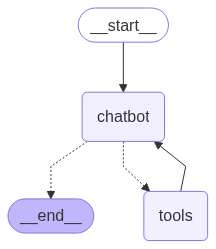

In [25]:
graph

In [26]:
graph_result = graph.invoke({'messages': ['Hi']}, {"recursion_limit": 10})
graph_result

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='c00c51b8-d8a4-46f0-84b3-f6644df20188'),
  AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--f0255f46-32e7-4255-8b7f-e10c34b58176-0', usage_metadata={'input_tokens': 1130, 'output_tokens': 11, 'total_tokens': 1141, 'input_token_details': {'cache_read': 0}})]}

In [27]:
graph_result = graph.invoke({'messages': ['Who are you']}, {"recursion_limit": 10})
graph_result

{'messages': [HumanMessage(content='Who are you', additional_kwargs={}, response_metadata={}, id='12c2b583-995a-4f84-9615-5489e5c779b1'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'my_biography', 'arguments': '{}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--4e0016b0-30e7-4a31-818d-157a327429c8-0', tool_calls=[{'name': 'my_biography', 'args': {}, 'id': '9ed4ecd9-8476-4ec1-8c23-4977a06fd8ff', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1132, 'output_tokens': 3, 'total_tokens': 1135, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='Name:\nRhea Sharma\n\nBio:\nRhea Sharma is a dynamic Indian entrepreneur and visionary in the field of artificial intelligence. As the founder and CEO of Indian AI Production, he has played a pivotal role in driving the adoption of agentic AI solutions for businesses across India and Southeast Asia. Rhea is wid

In [28]:
graph_result = graph.invoke({'messages': ['Who build  you']}, {"recursion_limit": 10})
graph_result

{'messages': [HumanMessage(content='Who build  you', additional_kwargs={}, response_metadata={}, id='b0297b93-ca3a-49de-8df2-bd28d327365c'),
  AIMessage(content='I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--e2e0715f-1eef-44da-83ea-b2aaaebb6d42-0', usage_metadata={'input_tokens': 1133, 'output_tokens': 12, 'total_tokens': 1145, 'input_token_details': {'cache_read': 0}})]}